<div class="alert alert-block alert-info">
    <b>Librerias</b></div>

In [92]:
import numpy as np
from numpy.linalg import matrix_rank
from numpy.random import uniform
from numpy import isnan
# ===================================

import pandas as pd
# ===================================

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import colors
# ===================================

import seaborn as sns
# ===================================

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# ===================================

import plotly.graph_objs as go
import plotly.offline as py
# ==============================

import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import silhouette_score
# =================================================

from scipy import stats
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist

# =================================================

import warnings
import os
import missingno as msno
import random
from random import sample
# =================================================
warnings.filterwarnings('ignore')

from kneed import KneeLocator

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [93]:
# Always good to set a seed for reproducibility
SEED = 42
np.random.seed(SEED)

<div class="alert alert-block alert-info">
    <b>Import</b></div>

Variables del dataset:

- status_id: El identificador único de cada publicación
- status_type: El tipo de publicación, como video, foto, estado o enlace
- status_published: La fecha y hora de la publicación
- num_reactions: El número de reacciones (me gusta, me encanta, wow, jaja, triste, enojado) a la publicación
- num_comments: El número de comentarios en la publicación
- num_shares: El número de veces que se ha compartido la publicación
- num_likes: El número de "me gusta" en la publicación
- num_loves: El número de "me encanta" en la publicación
- num_wows: El número de "wow" en la publicación
- num_hahas: El número de "jaja" en la publicación
- num_sads: El número de "triste" en la publicación
- num_angrys: El número de "enojado" en la publicación

In [94]:
df = pd.read_csv("C:\\Users\ASUSPC\\IT_academy\\\Tasca_M8\\Publicacions Facebook Thailandia.csv")

In [95]:
#Entorno de trabajo
# ==================
print(os.getcwd())

C:\Users\ASUSPC\IT_academy\Tasca_M8


<div class="alert alert-block alert-info">
    <b>Examen datos</b></div>

In [96]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [98]:
df.shape

(7050, 16)

In [99]:
df.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

In [100]:
print(df['status_id'].value_counts())
print("================================")
print(df['status_type'].value_counts())
print("================================")
print(df['status_published'].value_counts())

819700534875473_957599447752247      2
819700534875473_972433889602136      2
819700534875473_981835315328660      2
819700534875473_980941638751361      2
819700534875473_978746665637525      2
                                    ..
246675545449582_264078163709320      1
246675545449582_264081010375702      1
246675545449582_264089710374832      1
246675545449582_264092513707885      1
1050855161656896_1050858841656528    1
Name: status_id, Length: 6997, dtype: int64
photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64
3/20/2018 1:54     3
12/28/2017 8:09    2
4/30/2018 6:20     2
4/26/2018 19:00    2
4/23/2018 7:26     2
                  ..
9/6/2012 9:01      1
9/6/2012 9:16      1
9/6/2012 23:17     1
9/7/2012 0:21      1
9/10/2016 10:30    1
Name: status_published, Length: 6913, dtype: int64


In [101]:
df.loc[df['status_id'] == '819700534875473_957599447752247']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6213,819700534875473_957599447752247,photo,3/24/2018 23:51,157,16,3,145,1,11,0,0,0,NaN,NaN,NaN,NaN
6264,819700534875473_957599447752247,photo,3/24/2018 23:51,157,16,3,145,1,11,0,0,0,NaN,NaN,NaN,NaN


In [102]:
df.duplicated().sum()

51

<div class="alert alert-block alert-info">
    <b>NaN y null</b></div>

In [103]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

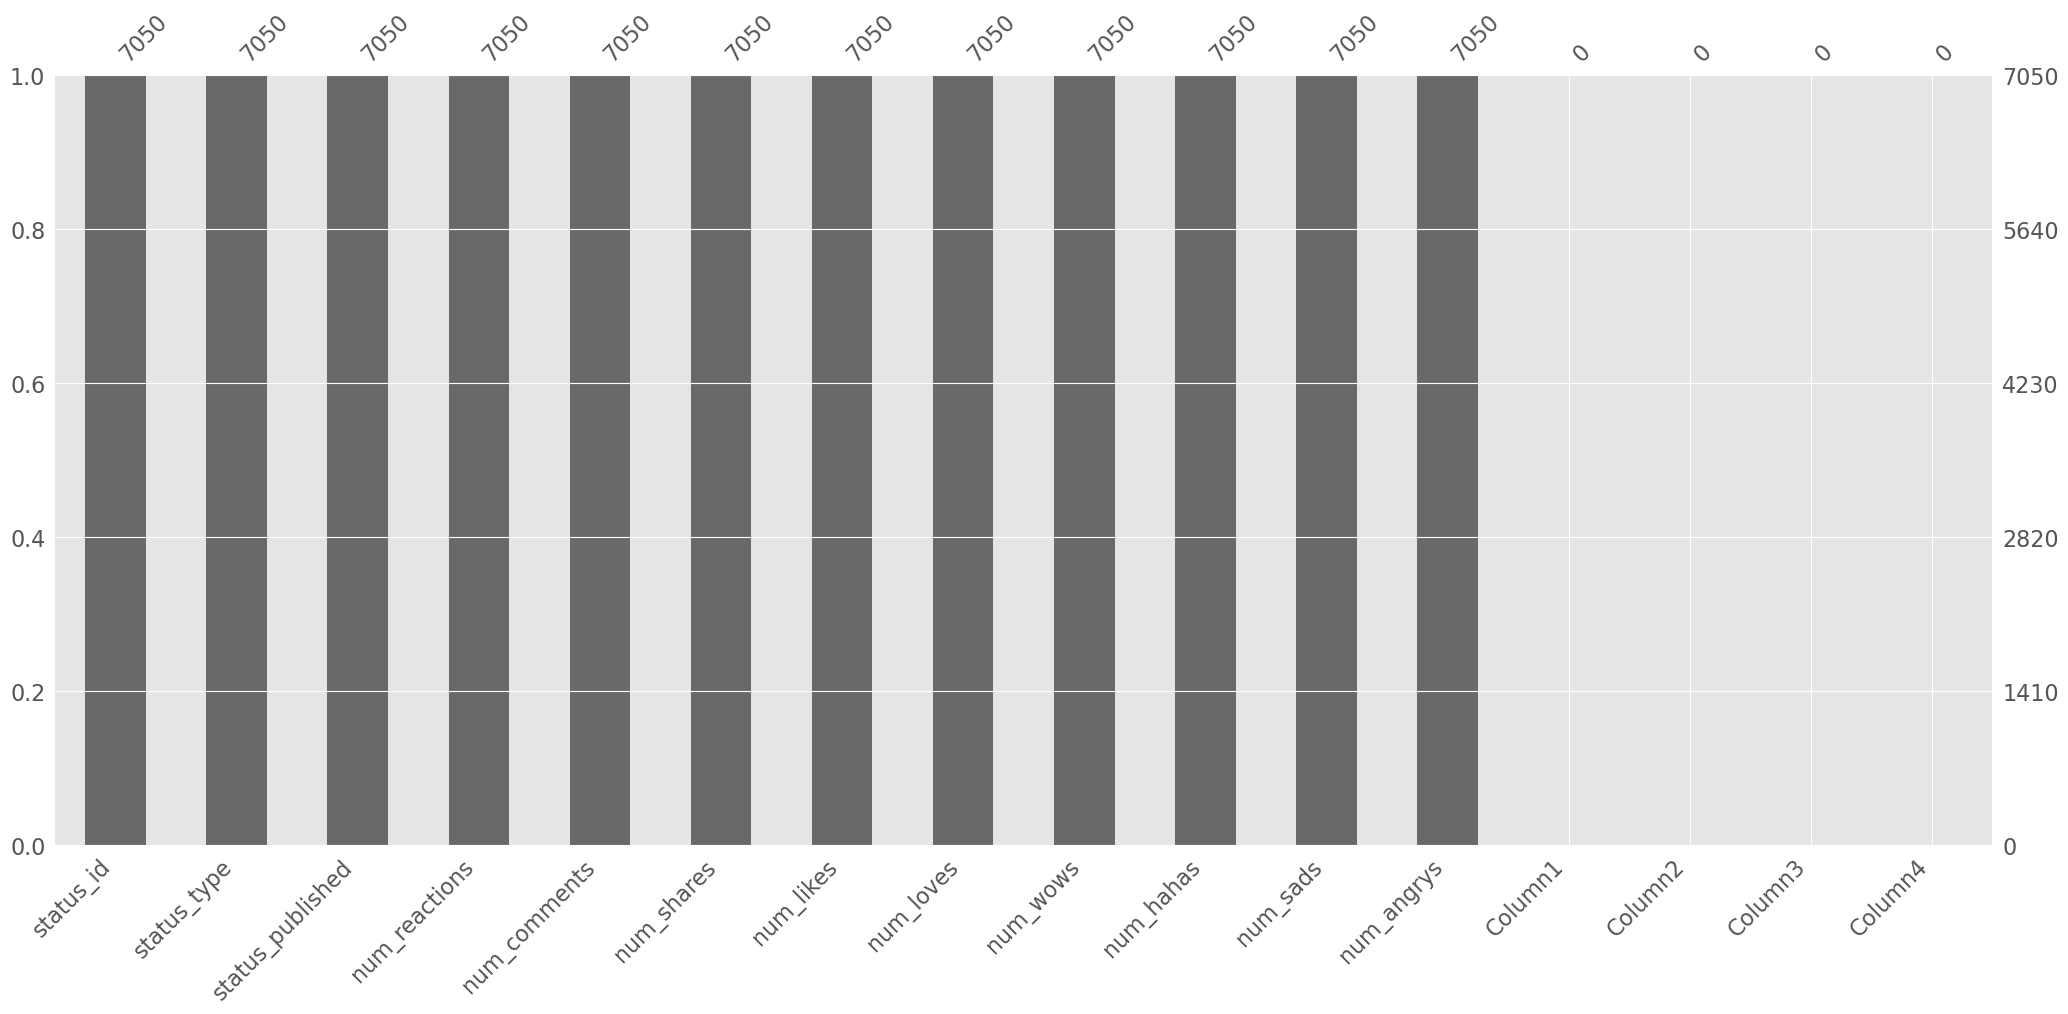

In [104]:
# Barplot de los nans
# ==================
msno.bar(df)
plt.show()

**Tras explorar los datos podemos observar que:** 
- Al parecer, todos los valores de las variables con nombre "Columna1/4" son NaN. Parece sensato eliminarlas ya que no aportan información util.
- El df contiene 51 valores duplicados.
- "status_id" y "status_published" han sido utiles para descubrir que hay duplicados, pero procedemos a eliminarlas.
- Aplicaremos a "status_type" encoding para pasarla a numerica.

<div class="alert alert-block alert-info">
    <b>Procesamiento datos</b></div>

In [105]:
# Eliminamos los duplicados
# =============================
df=df.drop_duplicates()

In [106]:
df.shape

(6999, 16)

In [107]:
# Eliminamos las variables "Columna1/4", "status_id" y "status_published".
# ===========================================================================
df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id', 'status_published'], axis=1, inplace=True)

In [108]:
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

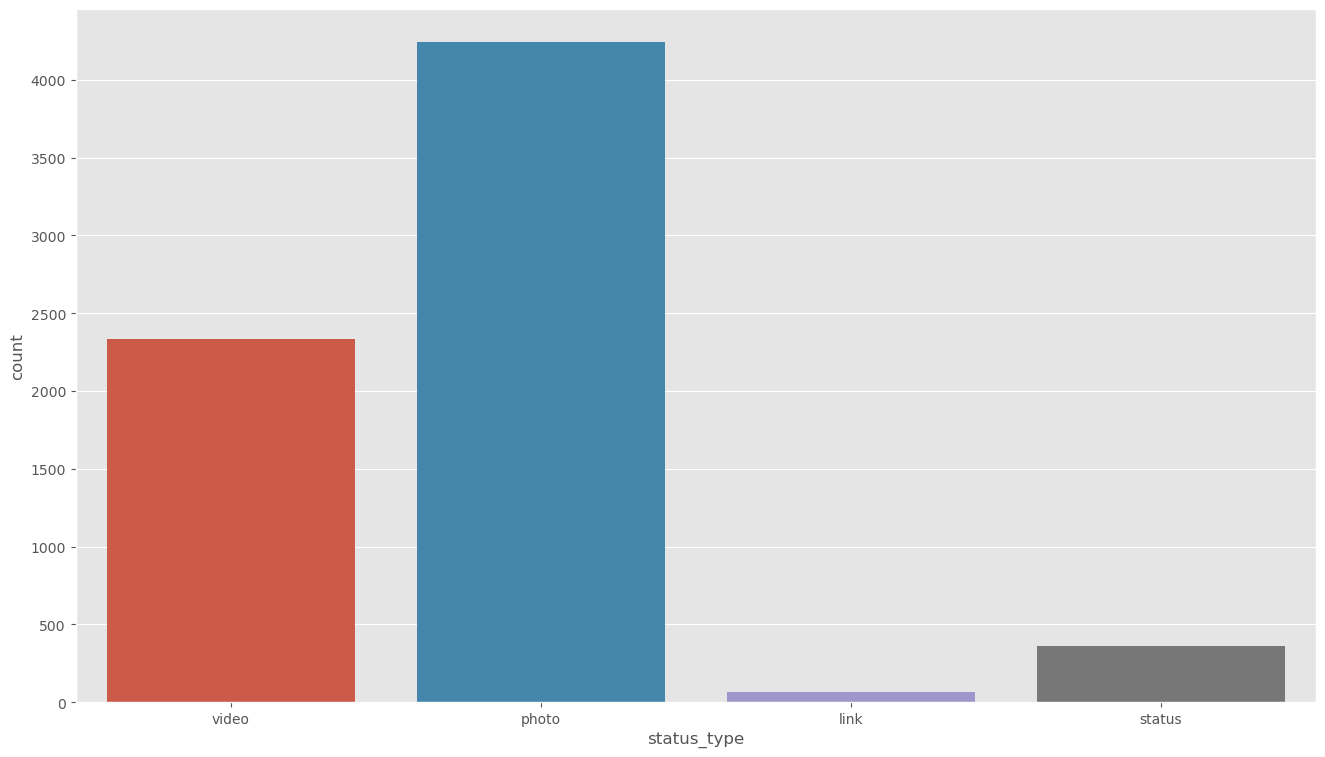

In [109]:
#Visualozamos status_type
# =====================================
sns.countplot(x='status_type', data=df)
plt.show()

La distribución desigual de las muestras en las categorías puede afectar al algoritmo, ya que es posible que los clústeres formados no reflejen adecuadamente las diferencias entre las categorías con un número menor de muestras.
Se convertirá la misma en dummy.

In [110]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6999.0,224.994571,452.880746,0.0,17.0,58.0,216.0,4710.0
num_comments,6999.0,225.552079,892.743010,0.0,0.0,4.0,22.0,20990.0
num_shares,6999.0,40.258608,132.046903,0.0,0.0,0.0,4.0,3424.0
num_likes,6999.0,209.946707,439.550330,0.0,17.0,57.0,182.0,4710.0
num_loves,6999.0,12.751536,40.106872,0.0,0.0,0.0,3.0,657.0
num_wows,6999.0,1.252893,8.725551,0.0,0.0,0.0,0.0,278.0
num_hahas,6999.0,0.697957,3.970912,0.0,0.0,0.0,0.0,157.0
num_sads,6999.0,0.232605,1.481105,0.0,0.0,0.0,0.0,51.0
num_angrys,6999.0,0.110159,0.688582,0.0,0.0,0.0,0.0,31.0


In [112]:
df.dtypes

status_type      object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
dtype: object

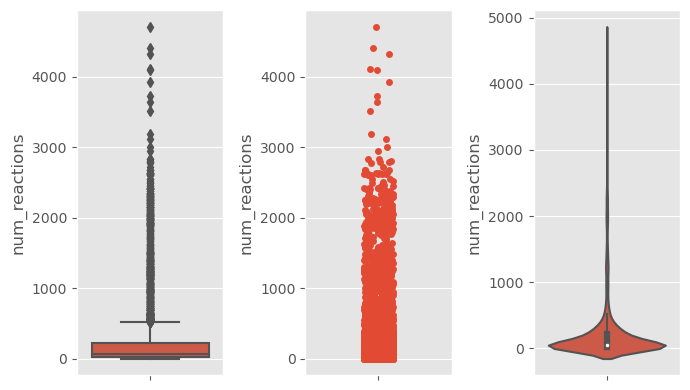

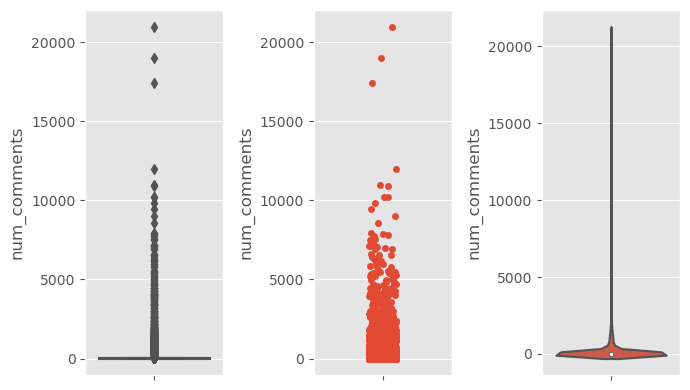

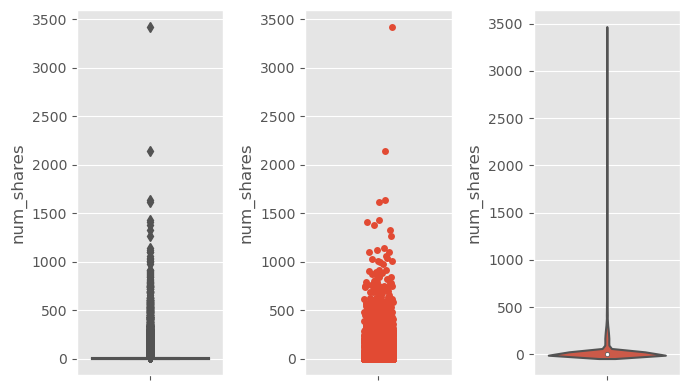

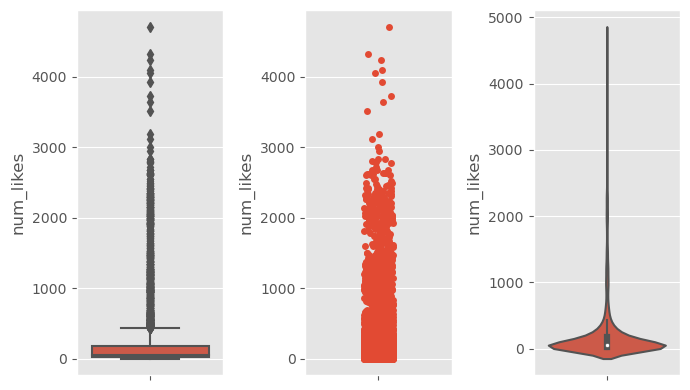

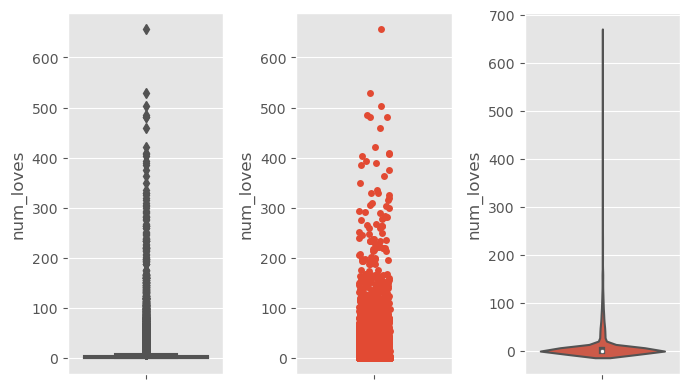

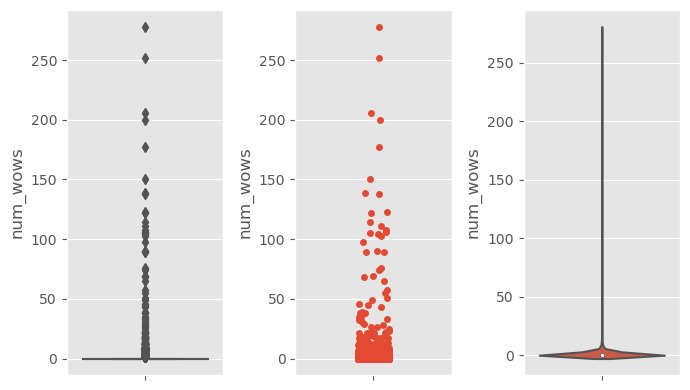

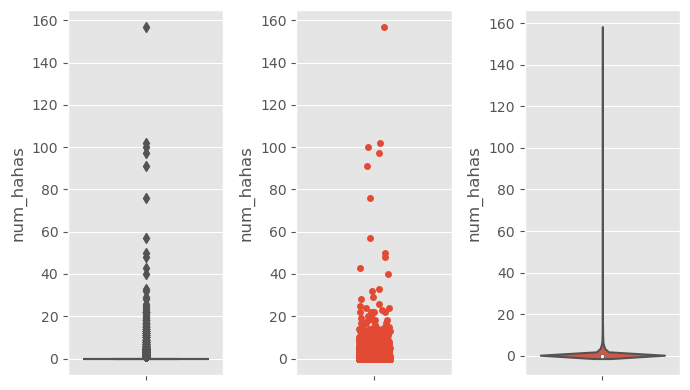

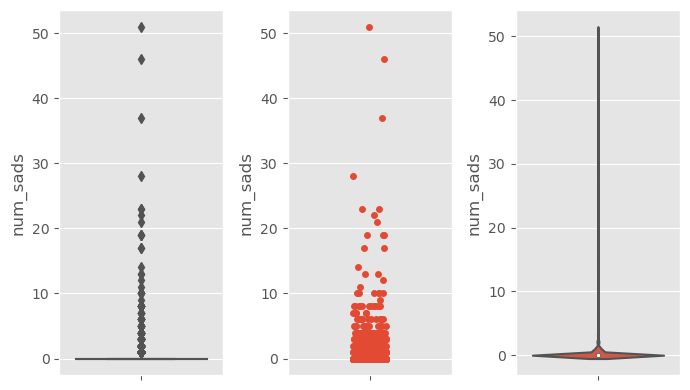

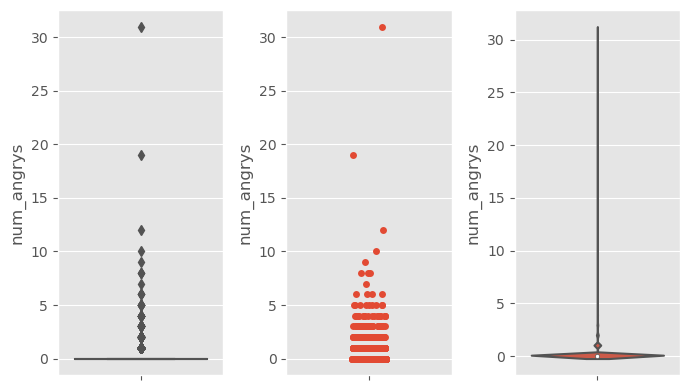

In [113]:
# Distribuciones: densidad, boxplot, astripchart, violinplot
# =======================================================================
plots=df.drop('status_type', axis = 1)
for i in plots:
    fig, axs = plt.subplots(ncols=3, figsize=(7, 4))

    sns.boxplot(data=plots, y=i,ax=axs[0])
    sns.stripplot(y= i,data=plots,ax=axs[1])
    sns.violinplot(data=plots, y=i,ax=axs[2])
    fig.tight_layout()
    plt.show()

In [114]:
# Utilizamos el test de shapiro para verificar la hipótesis de una distribución normal
# ==============================================================================
for i in plots:

    stat, p = stats.shapiro(df[i])
    print(f" {i} p-value = {p}")
    alpha = 0.05
    if p > alpha:
       print(f'no se rechaza la hipótesis nula H0')
    else:
       print(f'se rechaza la hipótesis nula H0')

 num_reactions p-value = 0.0
se rechaza la hipótesis nula H0
 num_comments p-value = 0.0
se rechaza la hipótesis nula H0
 num_shares p-value = 0.0
se rechaza la hipótesis nula H0
 num_likes p-value = 0.0
se rechaza la hipótesis nula H0
 num_loves p-value = 0.0
se rechaza la hipótesis nula H0
 num_wows p-value = 0.0
se rechaza la hipótesis nula H0
 num_hahas p-value = 0.0
se rechaza la hipótesis nula H0
 num_sads p-value = 0.0
se rechaza la hipótesis nula H0
 num_angrys p-value = 0.0
se rechaza la hipótesis nula H0


Como las variables no tienen distribución normal y contienen outliers, aplicaremos un robustscaler.

In [115]:
# Dividimos el dataset
# ===============================
X = df

In [116]:
print(X.shape)

(6999, 10)


In [117]:
X = pd.get_dummies(X, columns = ["status_type"], drop_first=True)

In [118]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_reactions       6999 non-null   int64
 1   num_comments        6999 non-null   int64
 2   num_shares          6999 non-null   int64
 3   num_likes           6999 non-null   int64
 4   num_loves           6999 non-null   int64
 5   num_wows            6999 non-null   int64
 6   num_hahas           6999 non-null   int64
 7   num_sads            6999 non-null   int64
 8   num_angrys          6999 non-null   int64
 9   status_type_photo   6999 non-null   uint8
 10  status_type_status  6999 non-null   uint8
 11  status_type_video   6999 non-null   uint8
dtypes: int64(9), uint8(3)
memory usage: 567.3 KB


In [119]:
X_copy = X.copy()

In [120]:
# Escalamos X
# ==================
robust_scaler = RobustScaler()

X_copy[['num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys']] = robust_scaler.fit_transform(X_copy[['num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys']])

In [121]:
X_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_reactions       6999 non-null   float64
 1   num_comments        6999 non-null   float64
 2   num_shares          6999 non-null   float64
 3   num_likes           6999 non-null   float64
 4   num_loves           6999 non-null   float64
 5   num_wows            6999 non-null   float64
 6   num_hahas           6999 non-null   float64
 7   num_sads            6999 non-null   float64
 8   num_angrys          6999 non-null   float64
 9   status_type_photo   6999 non-null   uint8  
 10  status_type_status  6999 non-null   uint8  
 11  status_type_video   6999 non-null   uint8  
dtypes: float64(9), uint8(3)
memory usage: 567.3 KB


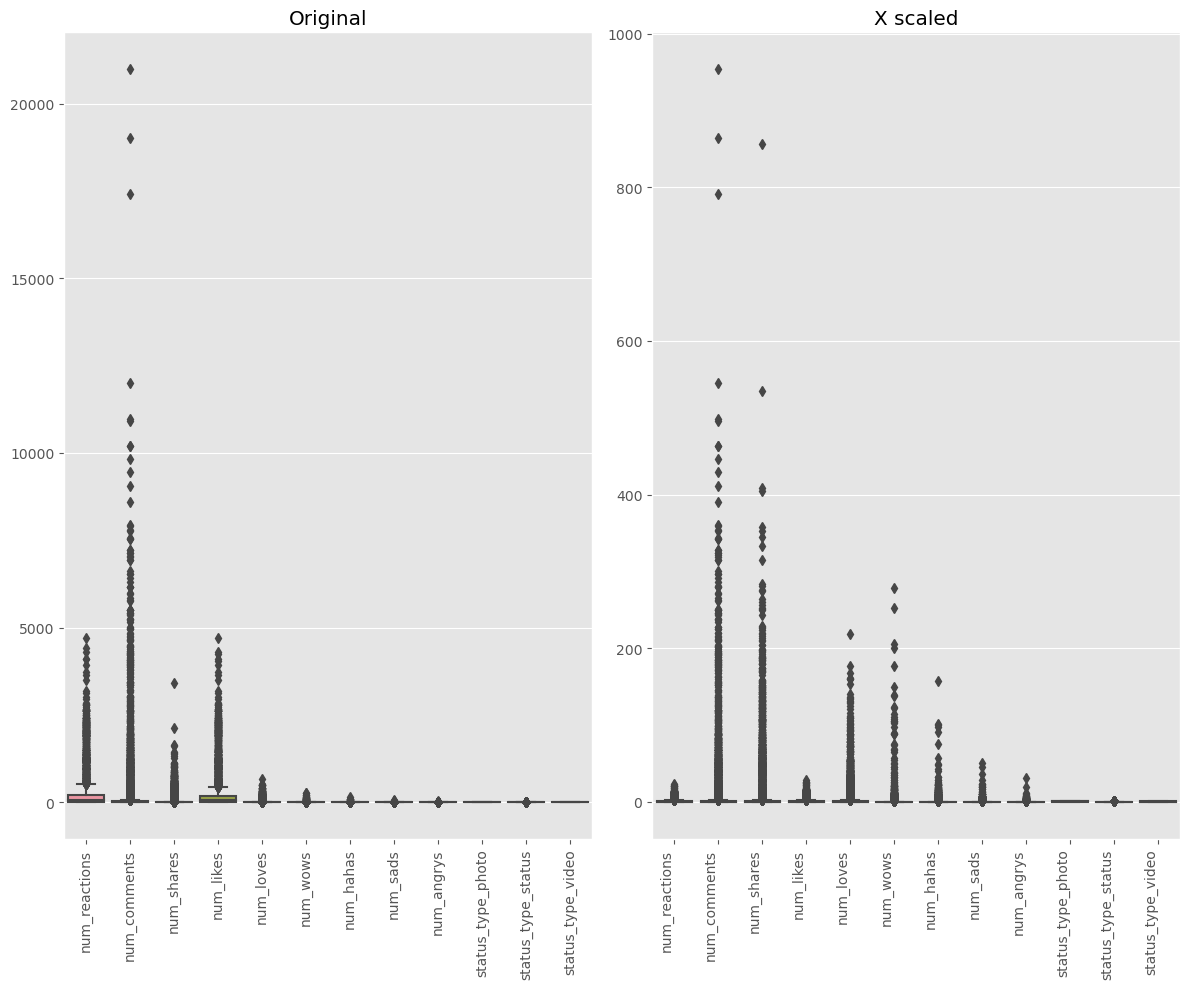

In [122]:
fig, ax = plt.subplots(1, 2, figsize=(12, 10))

plt.xticks(rotation=45, ha='right')

sns.boxplot(data=X, ax=ax[0])
ax[0].set_title('Original')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=X_copy, ax=ax[1])
ax[1].set_title('X scaled')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].tick_params(axis='x', rotation=90)

fig.tight_layout()

plt.show()

<div class="alert alert-info" role="alert">
  <strong>Exercici 1:</strong> 
    <p> Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

 Important

Tingues en compte que prèviament et caldrà preparar el dataset..</p>
</div>

**KMeans sin PCA**

In [123]:
# Verificamos que los datos sean buenos para clustering calculando el Hopkins score
# =====================================================================================
def hopkins(X_copy):
    d = X_copy.shape[1]
    n = len(X_copy)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)
    
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X_copy, axis=0),np.amax(X_copy,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X_copy.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd,wjd)
        HS=0
        
    return HS

hopkins(X)

0.9944374811595249

El Hopkins score se utiliza para medir la tendencia de los datos a formar conglomerados o agrupaciones. Un score cercano a 0.5 o inferior indica que los datos tienen una distribución aleatoria y pueden no ser adecuados para el clustering. Por otro lado, un score cercano a 1 indica una fuerte tendencia a la formación de conglomerados, lo que sugiere que los datos son adecuados para el clustering.

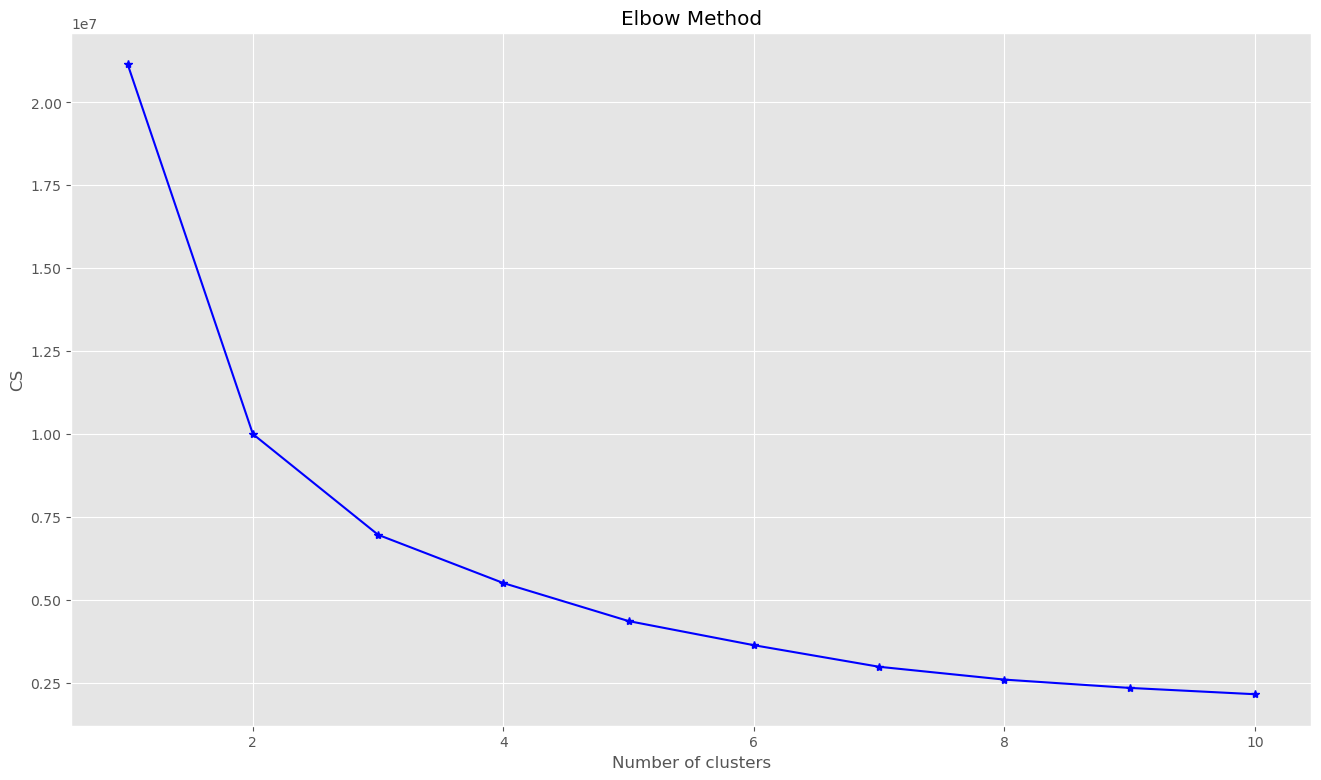

In [124]:
# Usamos el Elbow Methos to find the best number of k
# =========================================================
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = SEED)
    kmeans.fit(X_copy)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, "b*-")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

El numero optimo parece estar entre 2 y 4.

In [125]:
#Usamos el KneeLocator para obtener un valor mas preciso
# ========================================================
kl = KneeLocator(range(1,11), cs, curve="convex", direction="decreasing")
print("Número óptimo de clusters (Método del Codo):", kl.elbow)

Número óptimo de clusters (Método del Codo): 3


In [126]:
# Creamos el modelo con el resultado obtenido
# ======================================================
kmeans_model = KMeans(n_clusters=3, init = 'k-means++', random_state=SEED)
kmeans_model = kmeans_model.fit(X_copy)
y_kmeans = kmeans_model.predict(X_copy)

In [127]:
y_centroids = kmeans_model.cluster_centers_
y_inertia = kmeans_model.inertia_
y_labels = kmeans_model.labels_

In [128]:
print(y_centroids)
print("========================================")
print(y_inertia)
print("========================================")
print(y_labels)

[[7.14146753e-01 1.87685238e+00 2.20317398e+00 8.37171084e-01
  1.31217346e+00 5.80564263e-01 2.73667712e-01 1.38557994e-01
  4.96865204e-02 6.64733542e-01 5.62695925e-02 2.69122257e-01]
 [2.77986084e+00 2.69457605e+02 1.46670673e+02 2.50734266e+00
  3.99166667e+01 8.53846154e+00 8.28846154e+00 2.78846154e+00
  1.11538462e+00 9.61538462e-03 6.93889390e-18 9.90384615e-01]
 [1.99607747e+00 5.91958517e+01 7.98689320e+01 1.72001177e+00
  3.34491909e+01 8.11067961e+00 4.42135922e+00 8.81553398e-01
  6.56310680e-01 3.88349515e-03 6.93889390e-17 9.96116505e-01]]
6961783.986399844
[2 0 0 ... 0 0 0]


In [129]:
# Visualizamos los cluster en el df original
# ===========================================
df['cluster'] = y_kmeans
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,video,529,512,262,432,92,3,1,1,0,2
1,photo,150,0,0,150,0,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,0


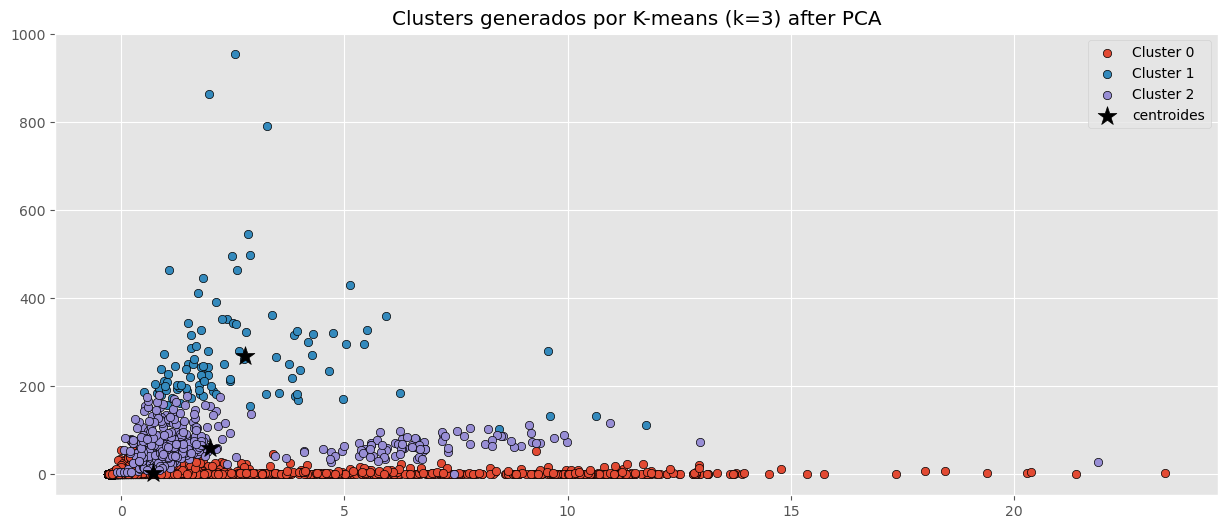

In [130]:
# Visualizamos el resultado
# ===========================
fig, ax = plt.subplots(figsize=(15, 6))

# Gráfico para k=3
ax.set_title('Clusters generados por K-means (k=3) after PCA')

for i in np.unique(y_kmeans):
    ax.scatter(
        x=X_copy.iloc[y_labels == i, 0],
        y=X_copy.iloc[y_labels == i, 1], 
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black', 
        label=f"Cluster {i}"
    )

ax.scatter(
    x=kmeans_model.cluster_centers_[:, 0],
    y=kmeans_model.cluster_centers_[:, 1], 
    c='black',
    s=200,
    marker='*',
    label='centroides'
)

ax.legend()

plt.show()

In [131]:
# Verificamos la calidad de los cluster calculando métricas de calidad
kmeans_ch_score = calinski_harabasz_score(X_copy, y_kmeans)
kmeans_db_score = davies_bouldin_score(X_copy, y_kmeans)

# Mostrar las métricas
print("Coeficiente de Calinski-Harabasz:", kmeans_ch_score)
print("Coeficiente de Davies-Bouldin:", kmeans_db_score)

Coeficiente de Calinski-Harabasz: 7129.833266813441
Coeficiente de Davies-Bouldin: 0.8061685266347212


Los coeficientes de Calinski-Harabasz (Calinski-Harabasz Index) y de Davies-Bouldin (Davies-Bouldin Index) son métricas que evalúan la cohesión interna y la separación entre clústeres. Por los resultados, parece ser que los clústeres son coherentes y están separados entre sí.

**KMeans con PCA**

In [132]:
# Usamos PCA para reducir la dimensionalidad de un conjunto de datos
# ===================================================================
pca = PCA().fit(X_copy.select_dtypes(include=['float']))
explained_var = np.cumsum(pca.explained_variance_ratio_)
print(explained_var)

[0.78433741 0.95436248 0.97873025 0.99178905 0.99552477 0.99920008
 0.99986845 1.         1.        ]


Usamos la explained_variance (varianza explicada) para explicar la varianza en los datos y aumentar la precisión de nuestro modelo y comprender cuántos componentes principales necesitamos ya que toma la suma acumulativa de todos los componentes en orden descendente hasta obtener uno. 

In [133]:
print("Numero de componentes explicados 70% de variancia: ", np.where(explained_var > 0.7)[0][0])
print("Numero de componentes explicados 90% de variancia: ", np.where(explained_var > 0.9)[0][0])
print("Numero de componentes explicados 95% de variancia: ", np.where(explained_var > 0.95)[0][0])

Numero de componentes explicados 70% de variancia:  0
Numero de componentes explicados 90% de variancia:  1
Numero de componentes explicados 95% de variancia:  1


Parece que el numero de componente que excplica el 95% de la varianza es el 2.

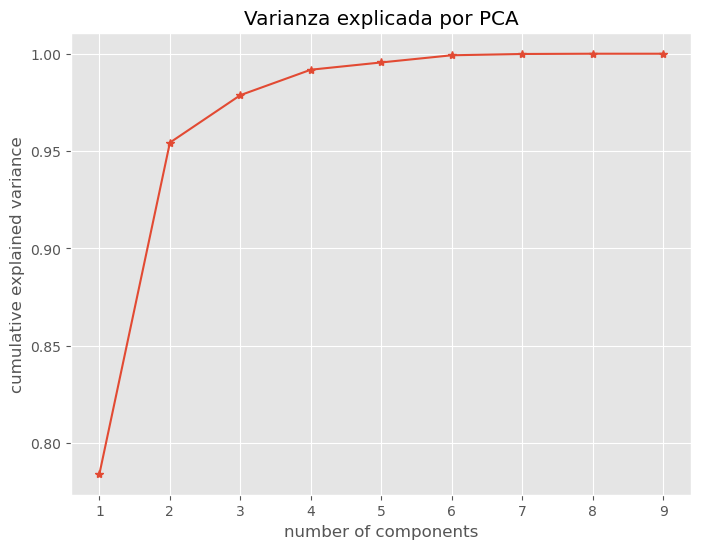

In [134]:
# Visualizamos mejor el resultado
# ===================================
plt.figure(figsize = (8, 6))
plt.plot(list(range(1, len(explained_var)+1)), explained_var, marker = "*")
plt.title("Varianza explicada por PCA")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Podemos ver como a partir de 3 componentes el aumento der la varianza empieza a nivelarse. Parece sensato seguir con 3 componentes.

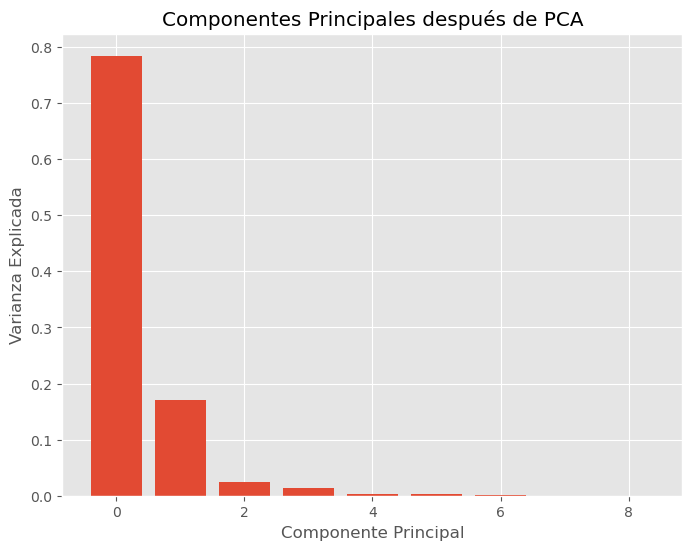

In [135]:
plt.figure(figsize = (8, 6))
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Componentes Principales después de PCA')
plt.show()

In [136]:
#Verificamos la importancia de las features
# ===========================================
pca = PCA(n_components=2)
X_copy_pca = pca.fit_transform(X_copy)
pca_best_components = pd.DataFrame(pca.components_,columns=X_copy.columns).T
pca_best_components['mean_weight'] = pca_best_components.iloc[:].abs().mean(axis=1)
pca_best_components.sort_values('mean_weight', ascending=False)

,0,1,mean_weight
num_comments,0.781633,-0.621237,0.701435
num_shares,0.587079,0.715917,0.651498
num_loves,0.199856,0.278863,0.239359
num_wows,0.055307,0.149829,0.102568
num_hahas,0.032998,0.028213,0.030606
num_reactions,0.010575,0.016810,0.013692
num_likes,0.008509,0.014102,0.011305
num_angrys,0.004423,0.004792,0.004608
num_sads,0.008180,-0.000979,0.004580
status_type_video,0.003872,0.002638,0.003255


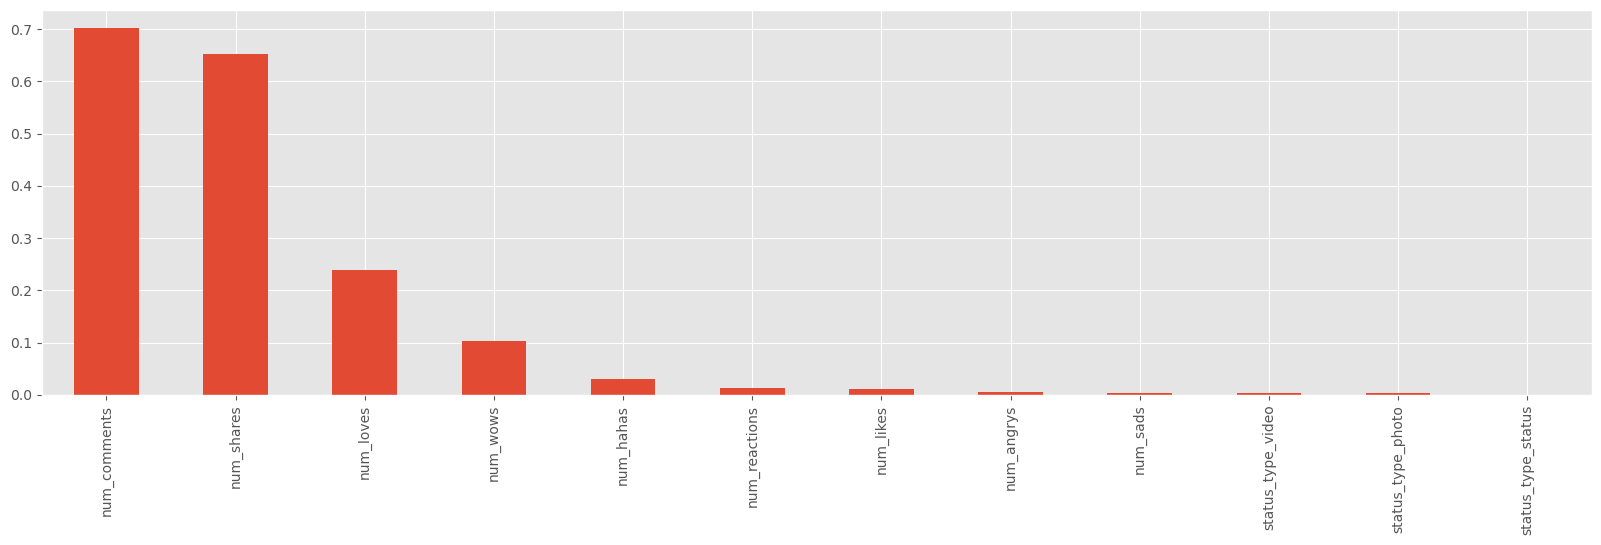

In [137]:
# Visualizamos los componentes principales
# =============================================
plt.figure(figsize=(20,5))
pca_best_components.mean_weight.sort_values( ascending=False).plot(kind='bar')
plt.show()

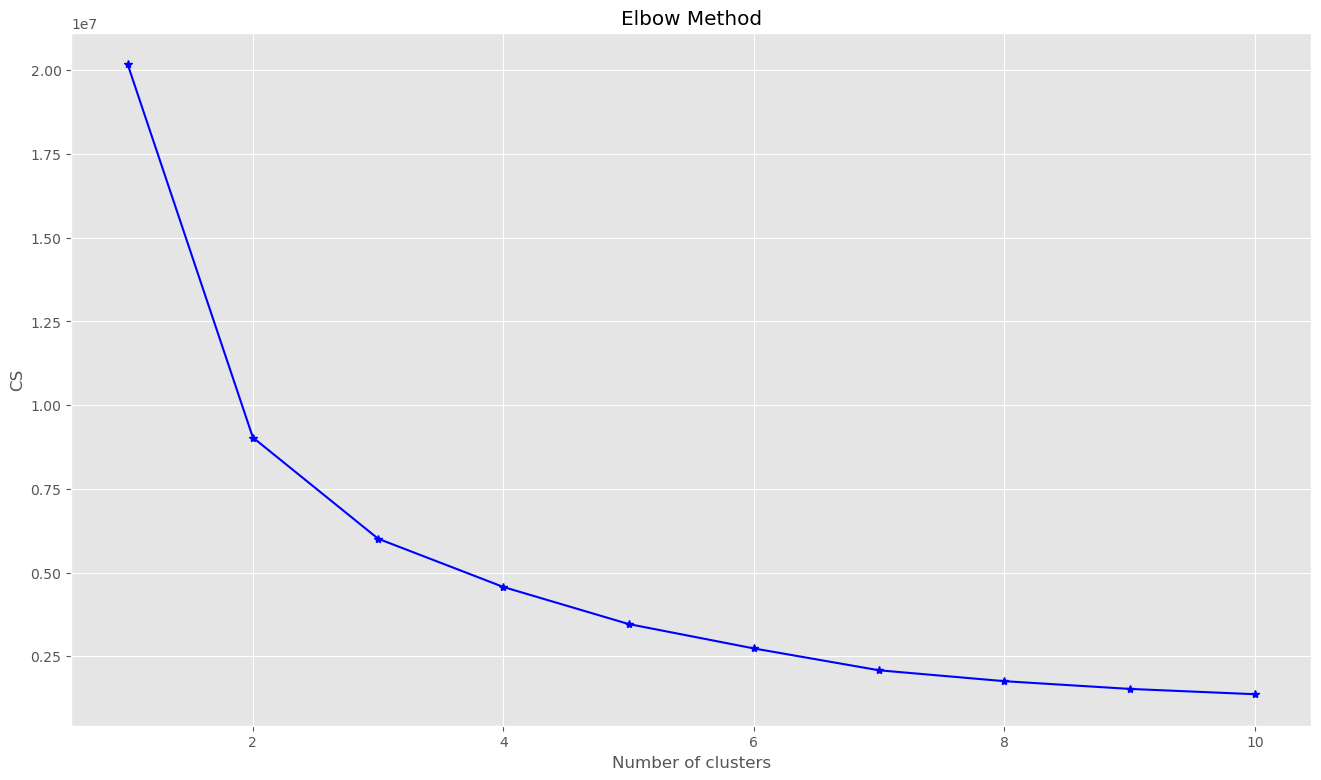

In [138]:
# Usamos el Elbow Methos to find the best number of k
# =========================================================
cs_pca = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = SEED)
    kmeans_pca.fit(X_copy_pca)
    cs_pca.append(kmeans_pca.inertia_)
plt.plot(range(1, 11), cs_pca, "b*-")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [139]:
#Usamos el KneeLocator para obtener un valor mas preciso
# ========================================================
kl_pca = KneeLocator(range(1,11), cs_pca, curve="convex", direction="decreasing")
print("Número óptimo de clusters (Método del Codo):", kl_pca.elbow)

Número óptimo de clusters (Método del Codo): 3


In [140]:
# Creamos el modelo con el resultado obtenido
# ======================================================
kmeans_model_gearsecond = KMeans(n_clusters=3, init = 'k-means++', random_state=SEED)
kmeans_model_gearsecond = kmeans_model_gearsecond.fit(X_copy_pca)
y_kmeans_gearsecond = kmeans_model_gearsecond.predict(X_copy_pca)

In [141]:
y_centroids_gearsecond = kmeans_model_gearsecond.cluster_centers_
y_inertia_gearsecond = kmeans_model_gearsecond.inertia_
y_labels_gearsecond = kmeans_model_gearsecond.labels_

In [142]:
print(y_centroids_gearsecond)
print("========================================")
print(y_inertia_gearsecond)
print("========================================")
print(y_labels_gearsecond)

[[-11.09665671  -1.20190373]
 [100.17888802  25.01656222]
 [335.02684531 -56.97174616]]
6010715.4027288845
[1 0 0 ... 0 0 0]


In [143]:
# Visualizamos los cluster en el df original
# ===========================================
df['cluster_pca'] = y_kmeans_gearsecond
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster,cluster_pca
0,video,529,512,262,432,92,3,1,1,0,2,1
1,photo,150,0,0,150,0,0,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0,0,0
3,photo,111,0,0,111,0,0,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0,0,0


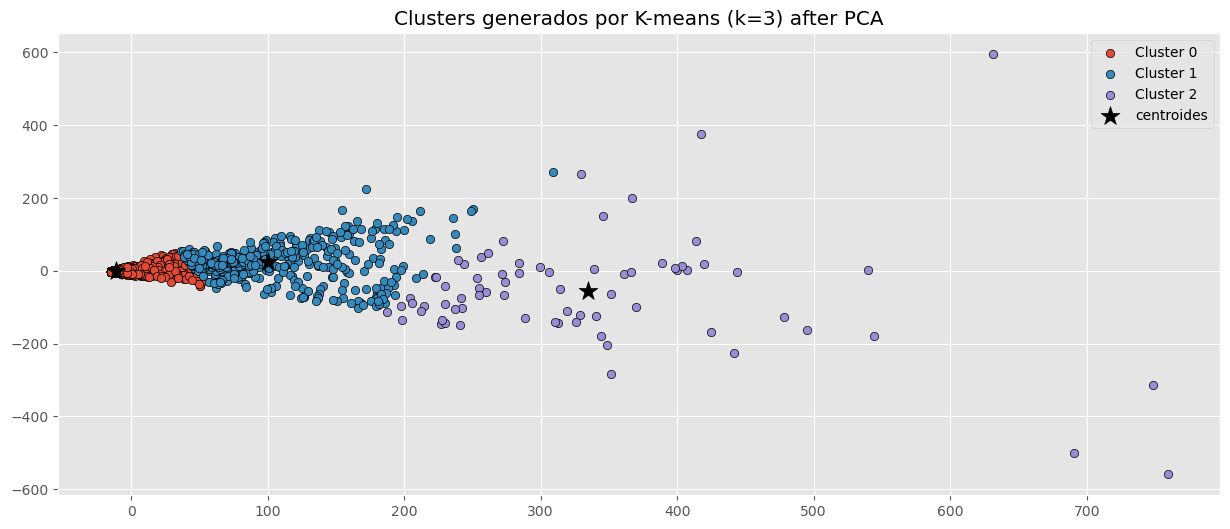

In [146]:
fig, ax = plt.subplots(figsize=(15, 6))

# Gráfico para k=3
ax.set_title('Clusters generados por K-means (k=3) after PCA')

for i in np.unique(y_kmeans_gearsecond):
    ax.scatter(
        x=X_copy_pca[y_labels_gearsecond == i, 0],
        y=X_copy_pca[y_labels_gearsecond == i, 1], 
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black', 
        label=f"Cluster {i}"
    )

ax.scatter(
    x=kmeans_model_gearsecond.cluster_centers_[:, 0],
    y=kmeans_model_gearsecond.cluster_centers_[:, 1], 
    c='black',
    s=200,
    marker='*',
    label='centroides'
)

ax.legend()

plt.show()

Al parecer aplicar el PCA ha mejorado la capacidad de agrupación del modelo reduciendo tambien la inercia del mismo. Podemos observar como los datos se proyectan en un nuevo espacio de menor dimensión, donde las componentes principales son combinaciones lineales de las características originales. 

<div class="alert alert-info" role="alert">
  <strong>Exercici 2:</strong> 
    <p> Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.</p>
</div>

In [147]:
# Empezamos generando una matrix linkage.
# Se usa el Cophenetic Correlation Coefficient para comparar los resultados con varios mnethodos y parametros.
# ============================================================================================================
methods = ['single', 'complete', 'average', 'weighted', 'ward']
metrics = ['euclidean', 'cityblock', 'hamming', 'cosine', 'correlation']

method_scores = []

for method in methods:
    for metric in metrics:
        try:
            proof = linkage(X_copy_pca, method=method, metric=metric)
            c, coph_dists = cophenet(proof, pdist(X_copy_pca))
            method_scores.append((method, metric, c))
        except ValueError:
            print(f"Method: {method}, Metric: {metric} - not supported...")

for score in method_scores:
    print(f"Method: {score[0]}, Metric: {score[1]}, Score: {score[2]:.4f}")

Method: ward, Metric: cityblock - not supported...
Method: ward, Metric: hamming - not supported...
Method: ward, Metric: cosine - not supported...
Method: ward, Metric: correlation - not supported...
Method: single, Metric: euclidean, Score: 0.8192
Method: single, Metric: cityblock, Score: 0.7939
Method: single, Metric: hamming, Score: 0.0135
Method: single, Metric: cosine, Score: 0.5856
Method: single, Metric: correlation, Score: 0.5835
Method: complete, Metric: euclidean, Score: 0.9515
Method: complete, Metric: cityblock, Score: 0.9752
Method: complete, Metric: hamming, Score: 0.0135
Method: complete, Metric: cosine, Score: 0.5828
Method: complete, Metric: correlation, Score: 0.5835
Method: average, Metric: euclidean, Score: 0.9567
Method: average, Metric: cityblock, Score: 0.9651
Method: average, Metric: hamming, Score: 0.0135
Method: average, Metric: cosine, Score: 0.5969
Method: average, Metric: correlation, Score: 0.5835
Method: weighted, Metric: euclidean, Score: 0.9291
Method:

Como un valor del coeficiente de copheneticidad cercano a 1 significa que el clustering preserva de manera efectiva las distancias entre las muestras originales, parece que la mejor combinación seria "avarage" con "cityblock"

In [148]:
Z = linkage(X_copy_pca, method='average', metric='cityblock')
Z

array([[2.30000000e+01, 6.54900000e+03, 0.00000000e+00, 2.00000000e+00],
       [7.90000000e+01, 1.59200000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.16700000e+03, 2.32900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.39890000e+04, 1.39930000e+04, 4.87569707e+02, 6.99500000e+03],
       [4.54300000e+03, 1.39910000e+04, 1.15471747e+03, 4.00000000e+00],
       [1.39940000e+04, 1.39950000e+04, 1.20032857e+03, 6.99900000e+03]])

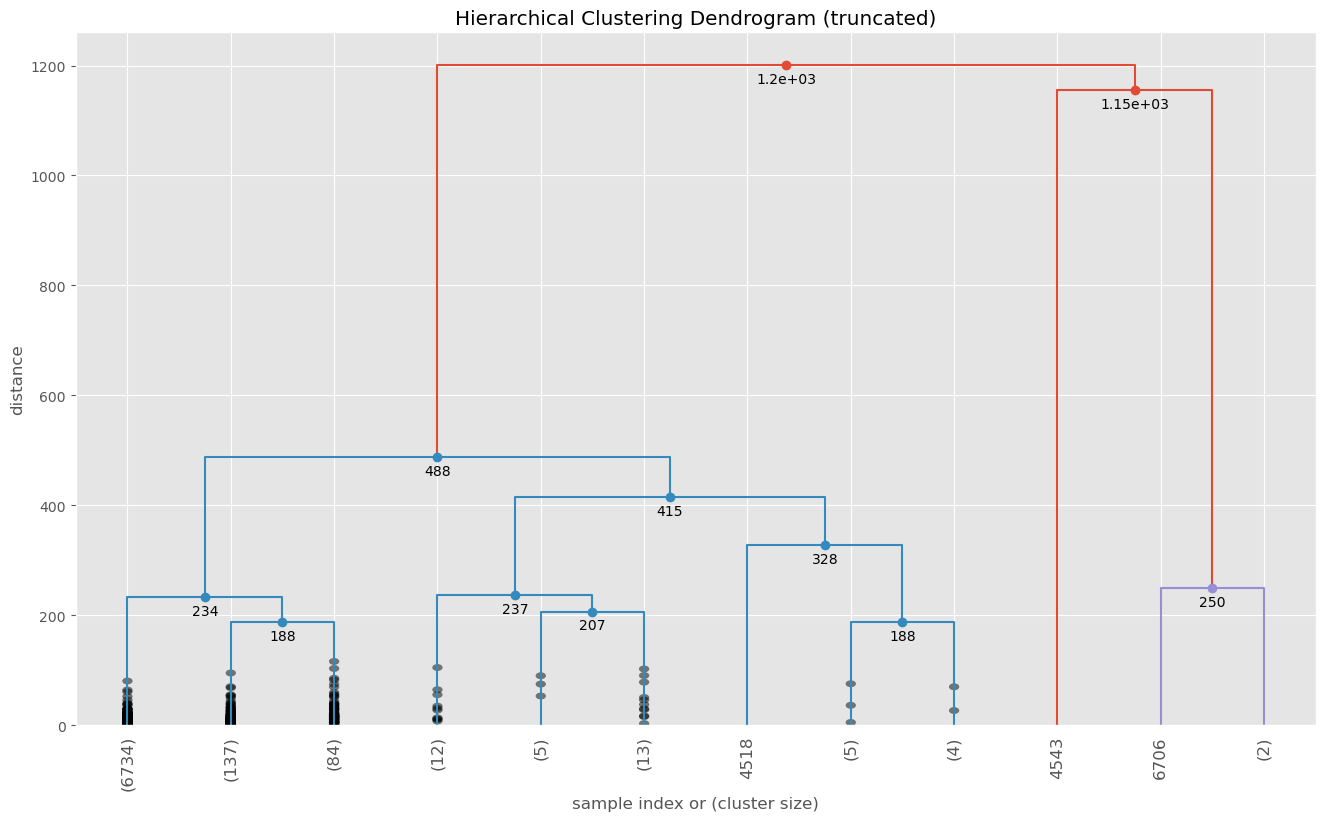

In [149]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

Parece sensato fijar 500 como punto de corte ya que es donde se puede identificar un salto significativo en la distancia entre clusters.

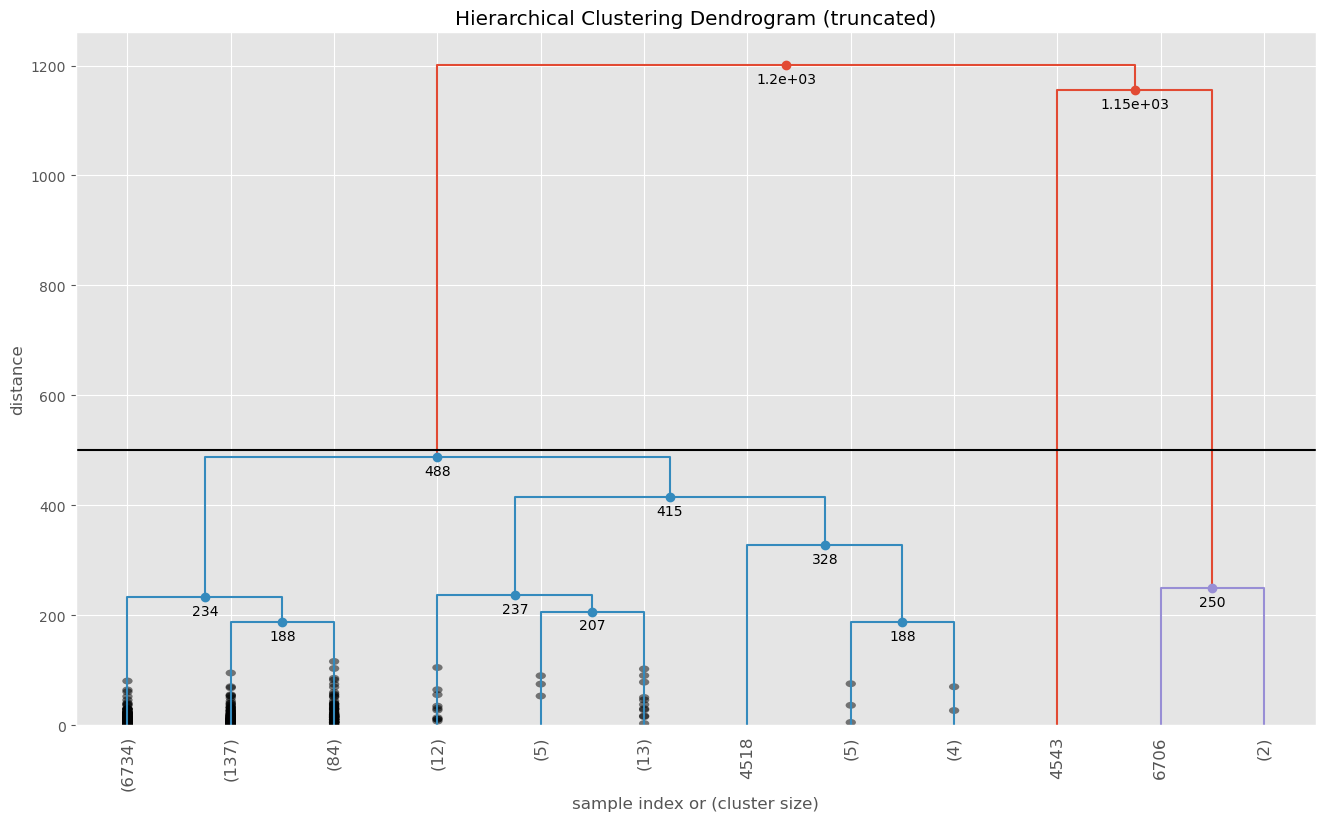

In [150]:
# set cut-off to 500
max_d = 500 # max_d as in max_distance

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

Como podemos ver por el resultado del corte, tenemos 3 cluster

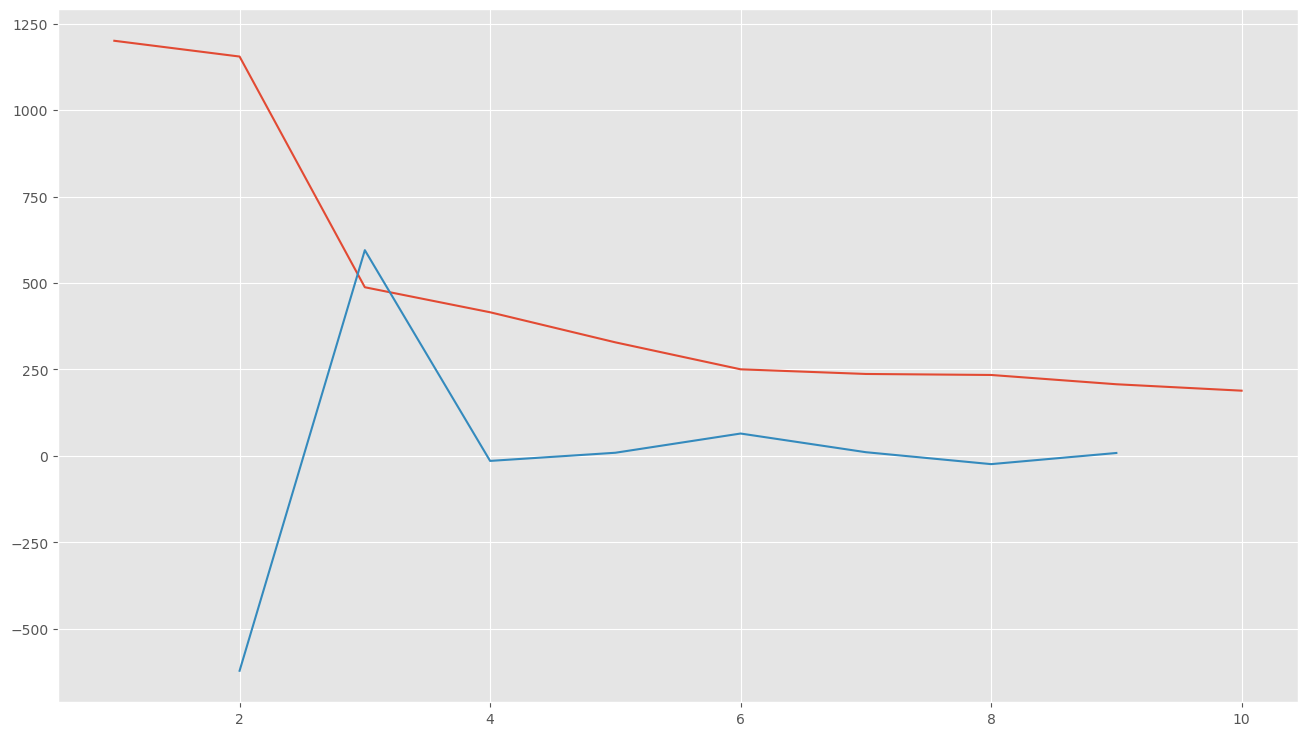

clusters: 3


In [151]:
# Se usa una variante del metodo elbow para confirmar el numero de clusters
# ===========================================================================
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [152]:
clusters_hier = fcluster(Z, max_d, criterion='distance')
clusters_hier

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

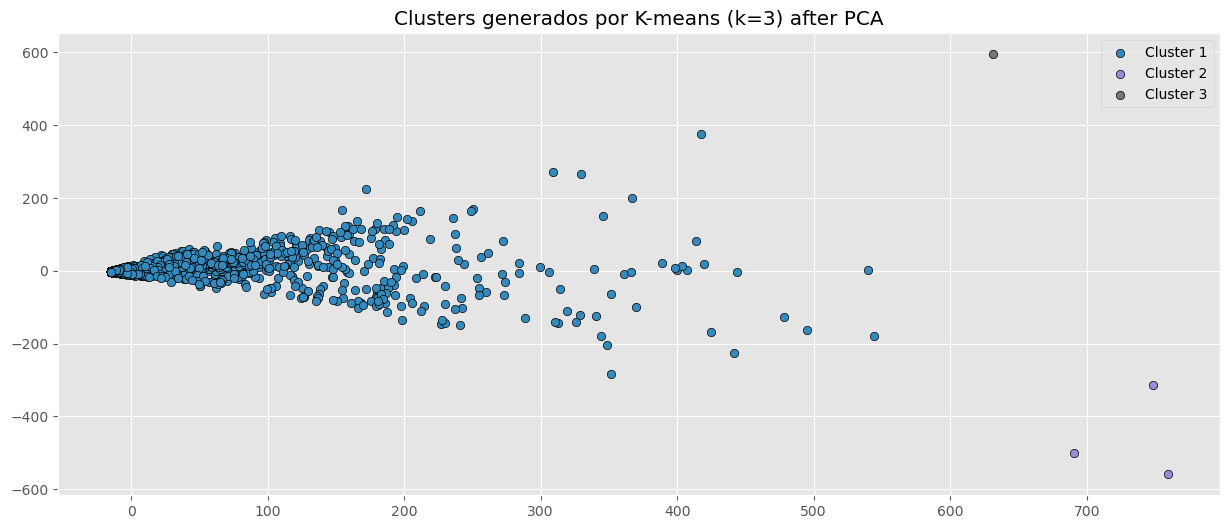

In [153]:
fig, ax = plt.subplots(figsize=(15, 6))

# Gráfico para k=3
ax.set_title('Clusters generados por K-means (k=3) after PCA')

for i in np.unique(clusters_hier):
    ax.scatter(
        x=X_copy_pca[clusters_hier == i, 0],
        y=X_copy_pca[clusters_hier == i, 1], 
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black', 
        label=f"Cluster {i}"
    )


ax.legend()

plt.show()

In [154]:
# Visualizamos los cluster en el df original
# ===========================================
df['cluster_hier'] = clusters_hier
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster,cluster_pca,cluster_hier
0,video,529,512,262,432,92,3,1,1,0,2,1,1
1,photo,150,0,0,150,0,0,0,0,0,0,0,1
2,video,227,236,57,204,21,1,1,0,0,0,0,1
3,photo,111,0,0,111,0,0,0,0,0,0,0,1
4,photo,213,0,0,204,9,0,0,0,0,0,0,1


Se puede observar como al aplicar el algoritmo de clustering jerárquico con los paramentros que han tenido mejor evaluación, la forma en que se calcula la similitud o distancia entre los puntos parece que haya afectado al número y la distribución de los clusters resultantes y ahora estan concentrados alrededor del cluster 0. Puede deberse a que el linkage utiliza diferentes criterios para determinar la similitud entre clústeres y puntos individuales.

<div class="alert alert-info" role="alert">
  <strong>Exercici 3:</strong> 
    <p> Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.</p>
</div>

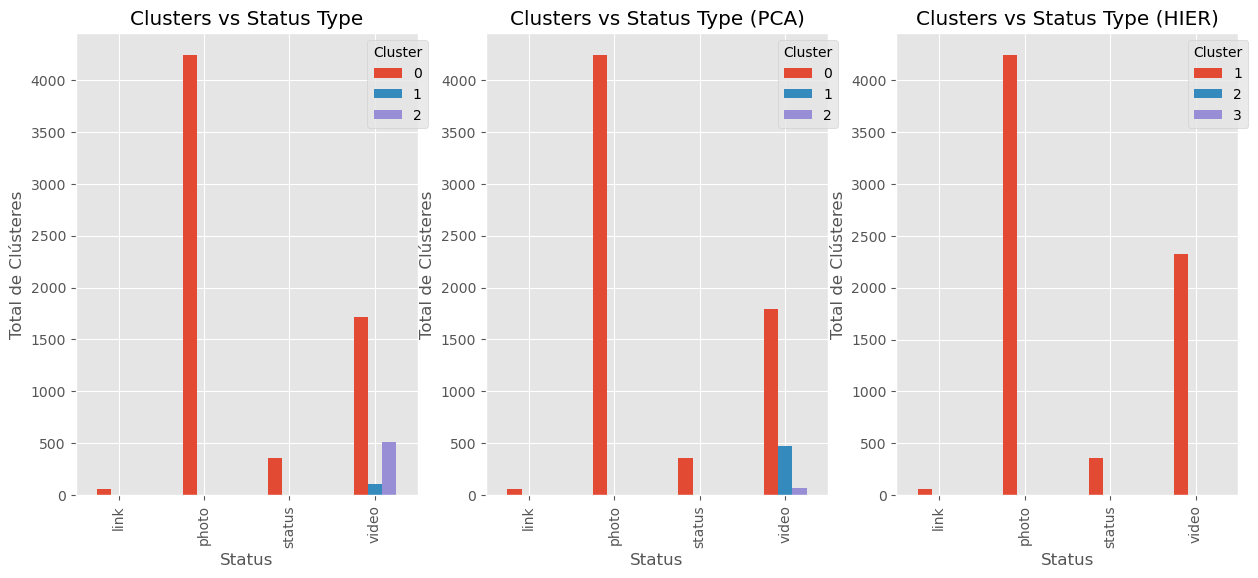

In [173]:
# Visualizamos el total de 'cluster' y 'cluster_pca'y 'cluster_hier' vs 'status_type' 
# =====================================================================
total_by_status = df.groupby(['status_type', 'cluster']).size().unstack(fill_value=0)
total_by_status_pca = df.groupby(['status_type', 'cluster_pca']).size().unstack(fill_value=0)
total_by_status_hier = df.groupby(['status_type', 'cluster_hier']).size().unstack(fill_value=0)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

total_by_status.plot(kind='bar', stacked=False, ax=ax1)
ax1.set_xlabel('Status')
ax1.set_ylabel('Total de Clústeres')
ax1.set_title('Clusters vs Status Type')
ax1.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper right')

total_by_status_pca.plot(kind='bar', stacked=False, ax=ax2)
ax2.set_xlabel('Status')
ax2.set_ylabel('Total de Clústeres')
ax2.set_title('Clusters vs Status Type (PCA)')
ax2.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper right')

total_by_status_hier.plot(kind='bar', stacked=False, ax=ax3)
ax3.set_xlabel('Status')
ax3.set_ylabel('Total de Clústeres')
ax3.set_title('Clusters vs Status Type (HIER)')
ax3.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper right')


plt.show()

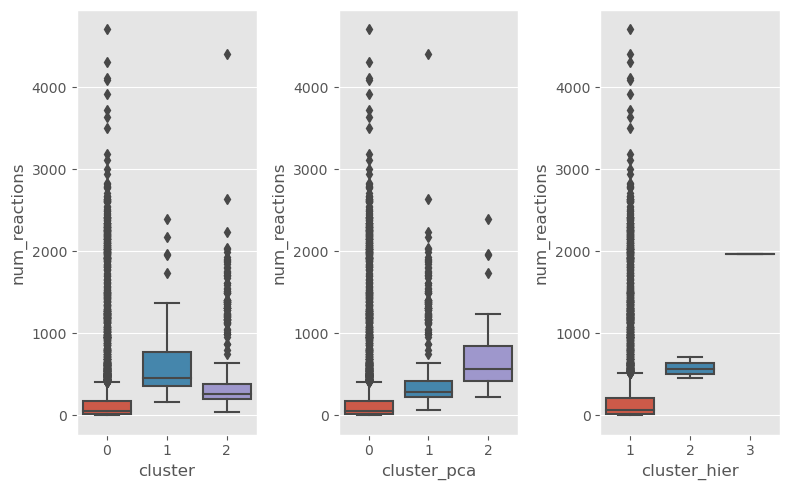

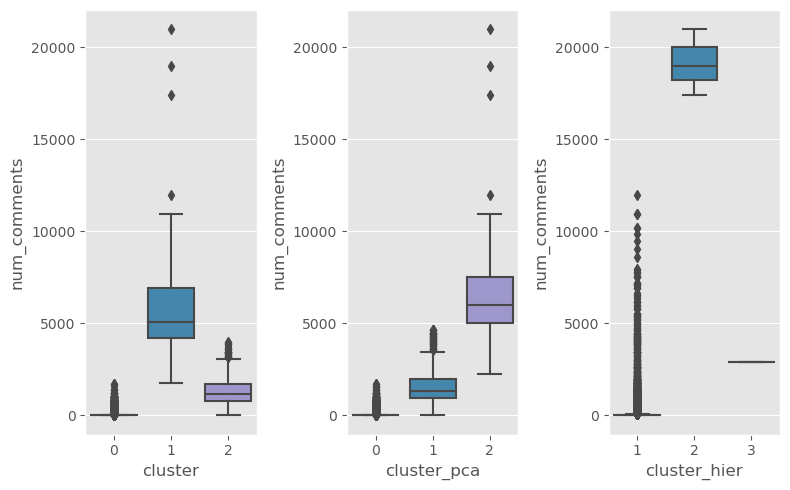

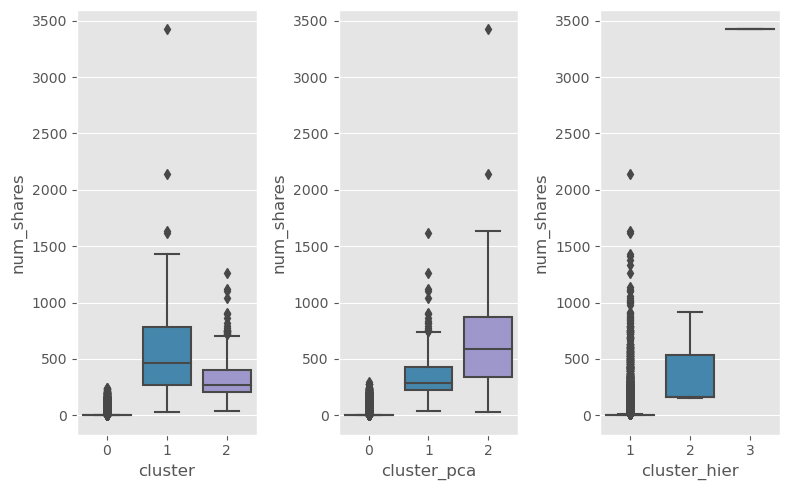

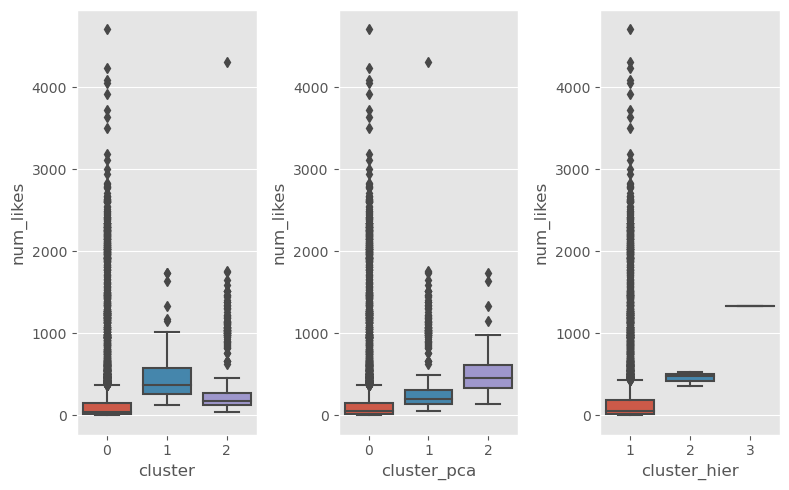

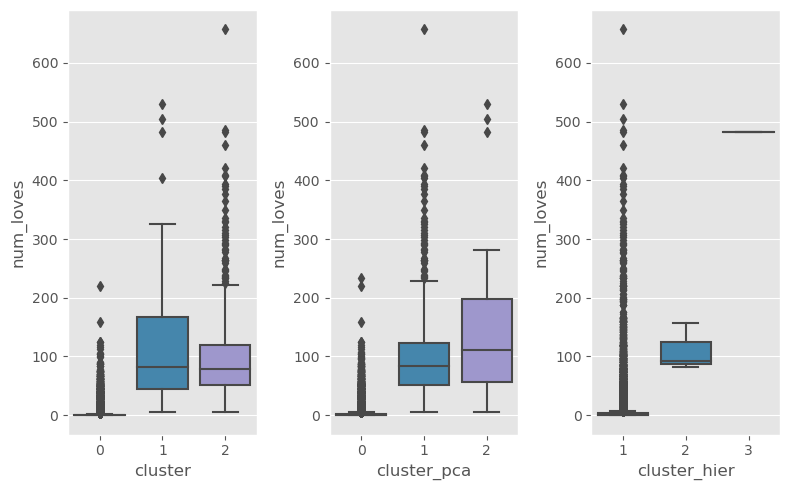

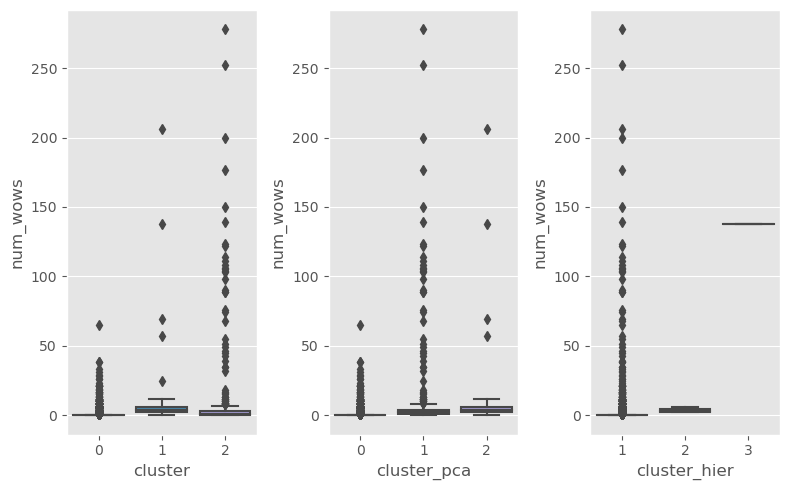

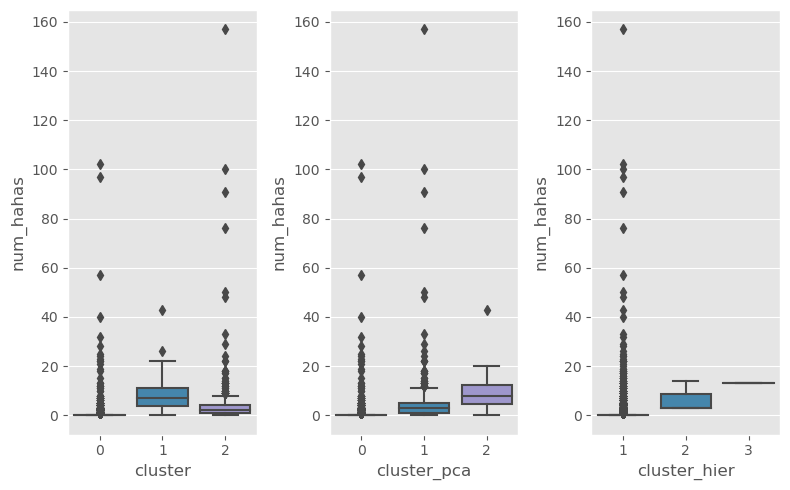

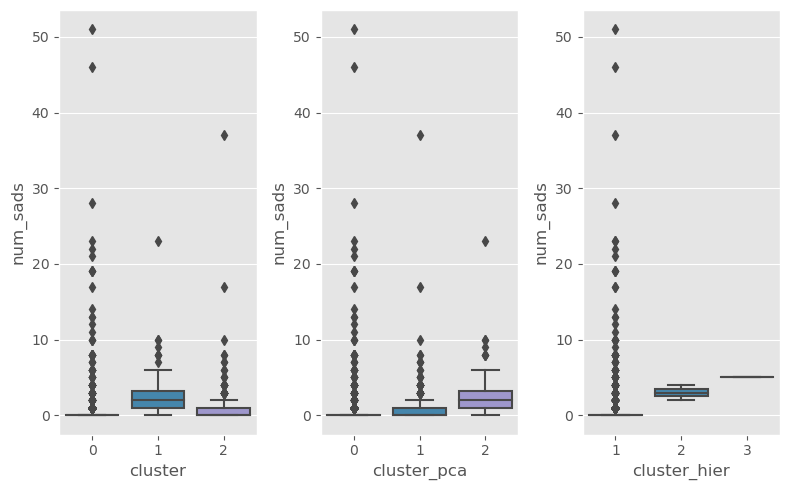

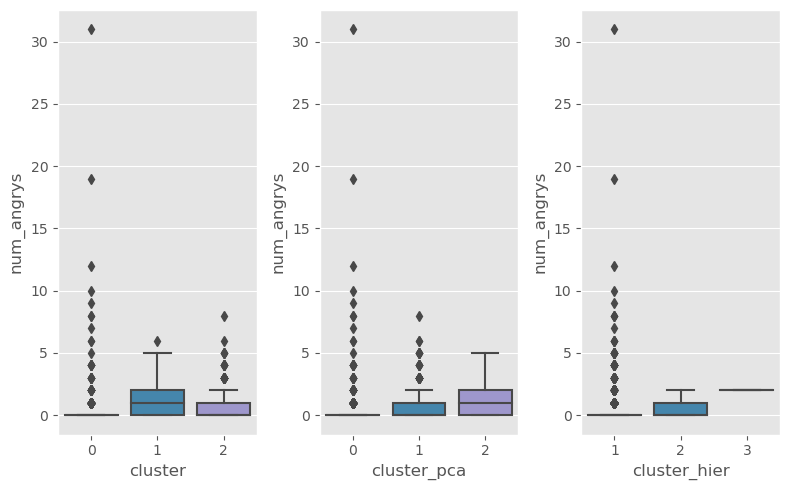

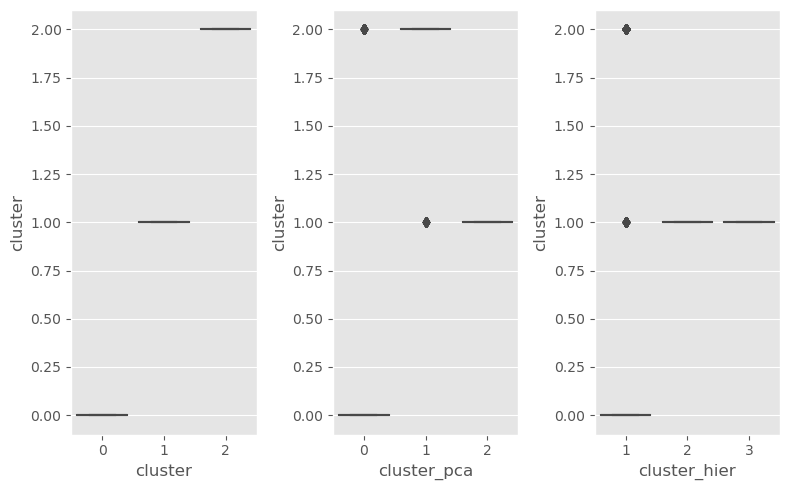

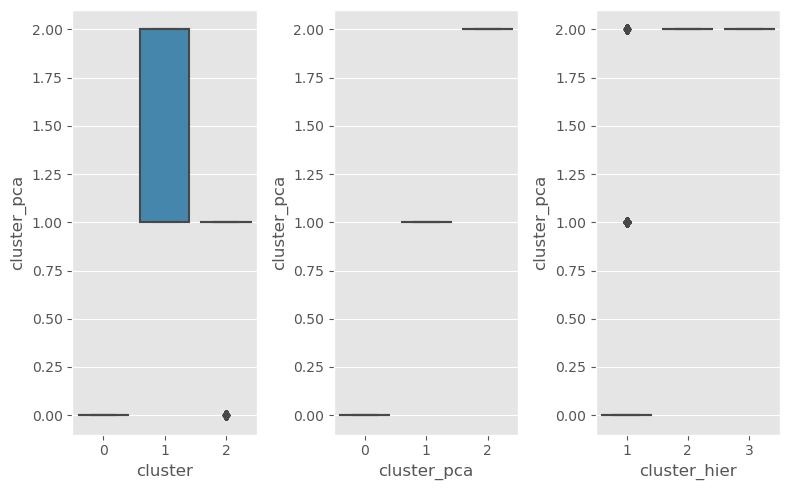

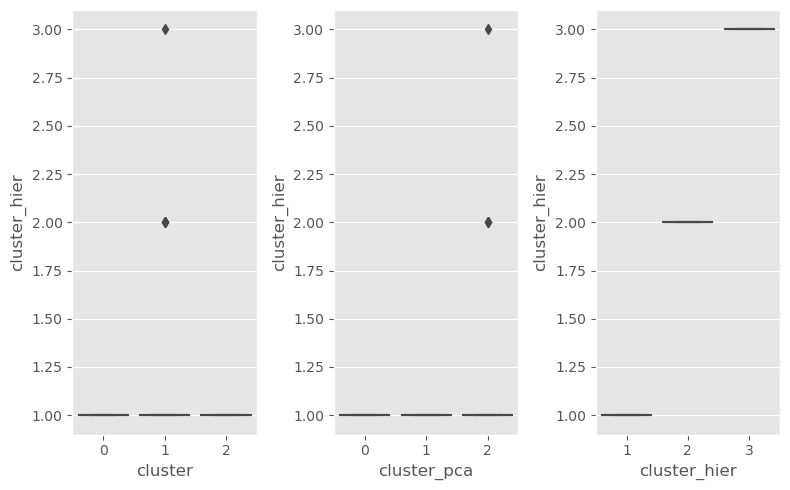

In [160]:
# Box plot para visualizar clusters y cluster_pca y cluster_hier vs variables
# ========================================================================
columns = df.drop('status_type', axis = 1)

    
for i in columns:
    fig, axs = plt.subplots(ncols=3, figsize=(8, 5))
    
    sns.boxplot(x='cluster', y=i, data=columns,ax=axs[0])
    sns.boxplot(x='cluster_pca', y=i, data=columns, ax=axs[1])
    sns.boxplot(x='cluster_hier', y=i, data=columns, ax=axs[2])

    fig.tight_layout()
    plt.show()

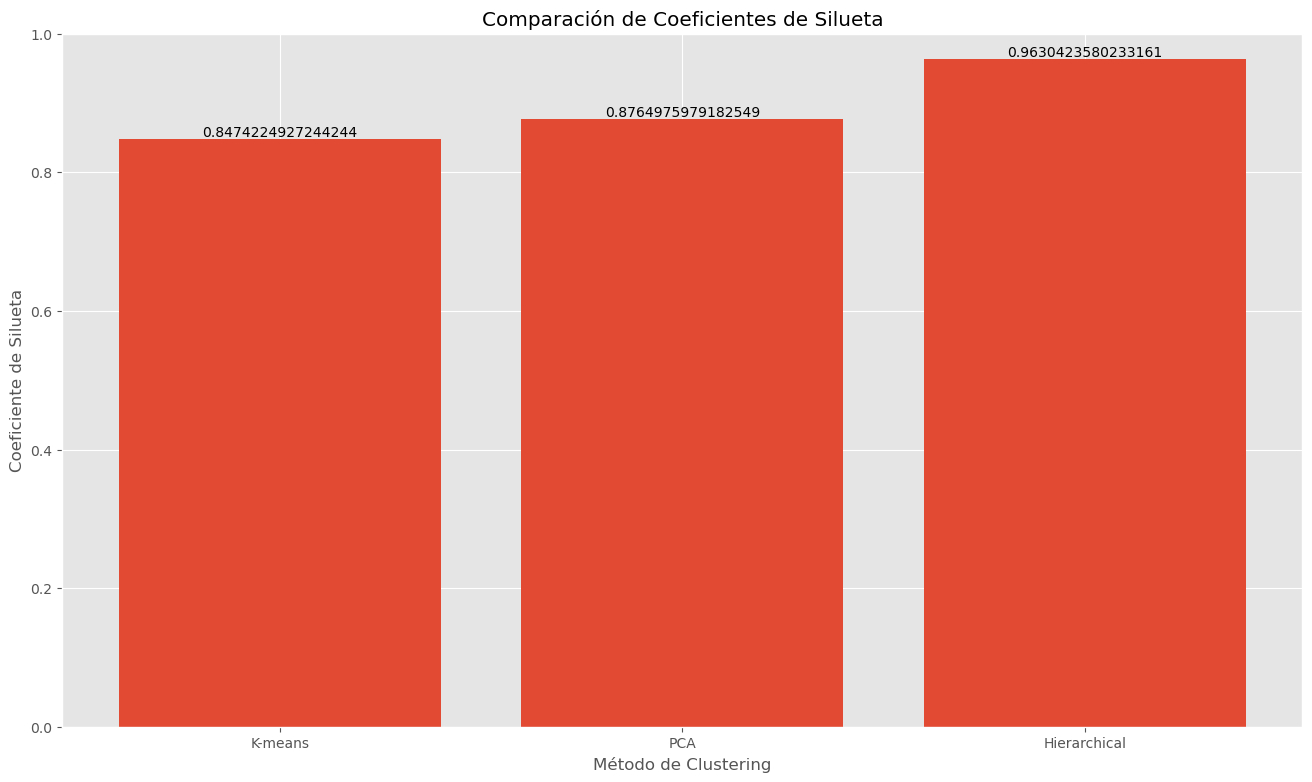

In [174]:
# Evaluamos la calidad de los modelos con el metodo Silhuette
# ===============================================================
kmeans_silhouette = silhouette_score(X_copy, y_kmeans)
pca_silhouette = silhouette_score(X_copy_pca, y_labels_gearsecond)
hier_silhouette = silhouette_score(X_copy_pca, clusters_hier)

# Etiquetas de los métodos
labels = ['K-means', 'PCA', 'Hierarchical']

# Valores de los coeficientes de silueta
silhouette_scores = [kmeans_silhouette, pca_silhouette, hier_silhouette]

# Plot de los coeficientes de silueta
plt.bar(labels, silhouette_scores)
plt.title('Comparación de Coeficientes de Silueta')
plt.xlabel('Método de Clustering')
plt.ylabel('Coeficiente de Silueta')
plt.ylim(0, 1)  # Rango del eje y de 0 a 1

# Etiquetas en las barras
for i, score in enumerate(silhouette_scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.show()

In [175]:
# Verificamos la calidad de los cluster calculando el coeficiente de Calinski-Harabasz:
# =====================================================================================
kmeans_ch_score
pca_ch_score = calinski_harabasz_score(X_copy_pca, y_labels_gearsecond)
hier_ch_score = calinski_harabasz_score(X_copy_pca, clusters_hier)
print("pca ch score: ", pca_ch_score)
print("kmeans ch score: " , kmeans_ch_score)
print("hierarquical ch score: ", hier_ch_score)

pca ch score:  8248.007316883772
kmeans ch score:  7129.833266813441
hierarquical ch score:  609.4736379883351


In [157]:
# Verificamos la calidad de los cluster calculando el coeficiente de Davies-Bouldin:
# =====================================================================================
kmeans_db_score
pca_db_score = davies_bouldin_score(X_copy_pca, y_labels_gearsecond)
hier_db_score = davies_bouldin_score(X_copy_pca, clusters_hier)
print("pca db score: ", pca_db_score)
print("kmeans db score: " , kmeans_db_score)
print("hierarquical db score: ", hier_db_score)

pca db score:  0.7466375871538057
kmeans db score:  0.8061685266347212
hierarquical db score:  0.13098552870165117


**En conclusion:** 
<br> parece ser que el clustering jerárquico obtiene los mejores coeficientes con los metodos Silhuette y Davies-Bouldin, factor que suele indicar una buena calidad del agrupamiento, con grupos bien definidos y una separación clara entre ellos, pero obtiene tambien un coeficiente de Calinski-Harabasz mas bajo, lo que podria sujerir que puede haber alguna superposición o interconexión entre los grupos.